# Automobile dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we are investigating Autommobile data set to find interesting insights
This data set consists of three types of entities: 

**1. The specification of an auto in terms of various characteristics**

**2. Its assigned insurance risk rating**
    - It corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
**3. Its normalized losses in use as compared to other cars**
    - It is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Dataset: https://drive.google.com/file/d/1j2l12TZ9ohnEOWq-jh2FaJPqMnfk1cET/view?usp=sharing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df=pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df['normalized-losses'].value_counts().head(3)

?      41
161    11
91      8
Name: normalized-losses, dtype: int64

In [4]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [5]:
df['price'].value_counts().head(3)

?       4
7898    2
7957    2
Name: price, dtype: int64

### Data Cleaning
> - replace missing values by NaN

In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df[df['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


**the above data has missing values for normalized losses and price there for we will drop those 4 rows**

In [9]:
df.drop(df[df['price'].isnull()].index,inplace=True)

In [10]:
#validate removing missing values:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

**Update data types for the following columns:**

In [11]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['price']=df['price'].astype(int)

**Replacing null values with the mean**

In [12]:
df['normalized-losses'].groupby(df['make']).mean()

make
alfa-romero             NaN
audi             161.000000
bmw              190.000000
chevrolet        100.000000
dodge            133.444444
honda            103.000000
isuzu                   NaN
jaguar           145.000000
mazda            123.933333
mercedes-benz    102.800000
mercury                 NaN
mitsubishi       146.200000
nissan           135.166667
peugot           161.000000
plymouth         129.000000
porsche          186.000000
renault                 NaN
saab             127.000000
subaru            92.250000
toyota           110.290323
volkswagen       121.250000
volvo             91.454545
Name: normalized-losses, dtype: float64

In [13]:
df['normalized-losses'] = df['normalized-losses'].fillna(df.groupby('make')['normalized-losses'].transform('mean'))
df['normalized-losses'].isnull().sum()

8

In [14]:
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)

In [15]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

In [16]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Drop columns**
['num-of-doors','bore','stroke','peak-rpm','engine-location','engine-size','city-mpg','highway-mpg','aspiration']

In [17]:
df.drop(['num-of-doors','bore','stroke','peak-rpm','engine-location','engine-size','city-mpg','highway-mpg','aspiration'],axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,compression-ratio,horsepower,price
0,3,125.912731,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,9.0,111.0,13495
1,3,125.912731,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,9.0,111.0,16500
2,1,125.912731,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,mpfi,9.0,154.0,16500
3,2,164.000000,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,mpfi,10.0,102.0,13950
4,2,164.000000,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,mpfi,8.0,115.0,17450


In [18]:
df.shape

(201, 17)

**Now we have 17 columns to deal with**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 17 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
fuel-system          201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-null float64
price                201 non-null int32
dtypes: float64(7), int32(1), int64(2), object(7)
memory usage: 37.5+ KB


**Checking for duplicates**

In [20]:
df.duplicated().sum()

0

In [21]:
#Some statistics for the data:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,compression-ratio,horsepower,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.912731,98.797015,174.200995,65.889055,53.766667,2555.666667,10.164279,103.396985,13207.129353
std,1.254802,35.058805,6.066366,12.322175,2.101471,2.447822,517.296727,4.004965,37.365602,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,7.000000,48.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,8.600000,70.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,9.000000,95.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,9.400000,116.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,23.000000,262.000000,45400.000000


In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,compression-ratio,horsepower,price
0,3,125.912731,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,9.0,111.0,13495
1,3,125.912731,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,mpfi,9.0,111.0,16500
2,1,125.912731,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,mpfi,9.0,154.0,16500
3,2,164.000000,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,mpfi,10.0,102.0,13950
4,2,164.000000,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,mpfi,8.0,115.0,17450


<a id='eda'></a>
## Exploratory Data Analysis

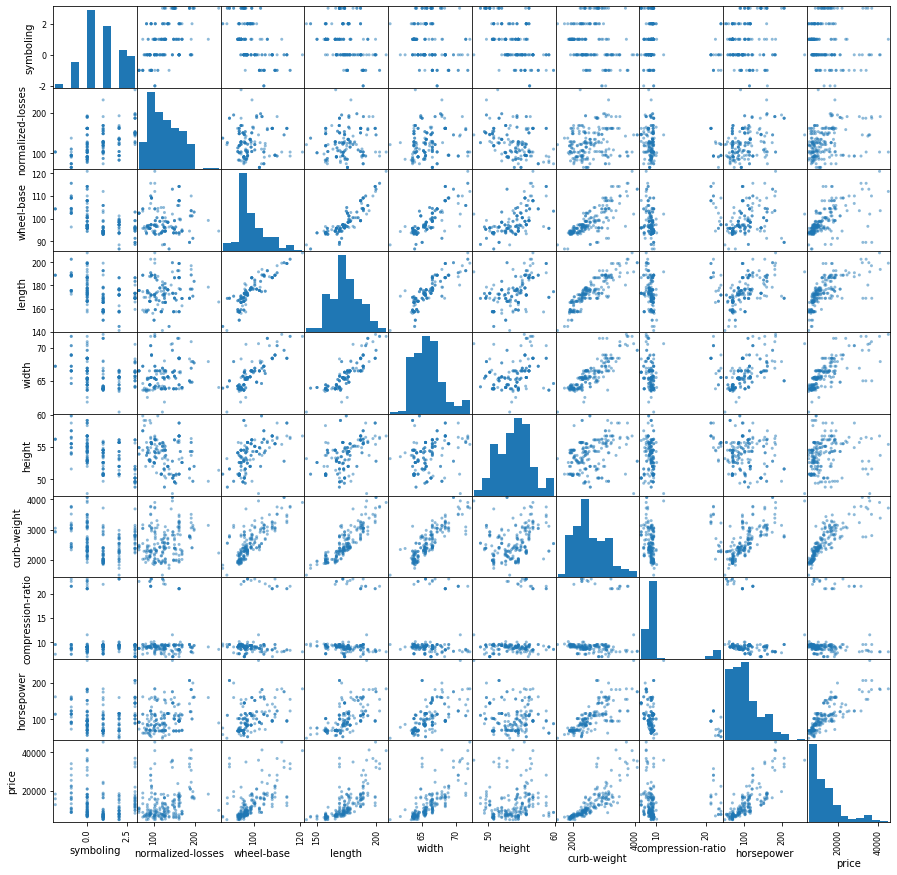

In [23]:
pd.plotting.scatter_matrix(df, figsize = (15, 15));

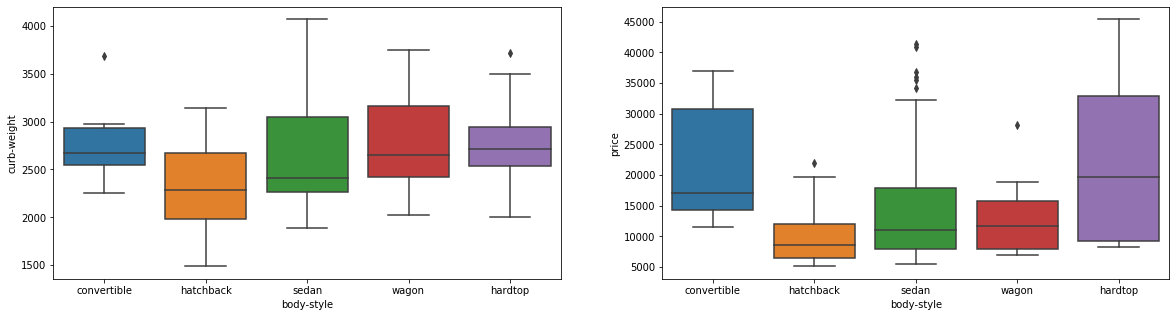

In [24]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.boxplot(data=df,x='body-style',y='curb-weight')
plt.subplot(1,2,2)
sb.boxplot(data=df,x='body-style',y='price');

**here we try to find if every body-style have different features like price or curb-weight and from the two plots above we see that there is different range for each body-style for example hatchback cars are the cheapest type and have less curb weight than others**

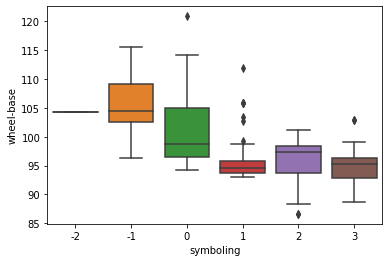

In [25]:
sb.boxplot(data=df,x='symboling',y='wheel-base');

**from the plot above we can tell that maybe there is a relationship between symboling and wheel-base as symboling is considered safer while wheel base is reduced**

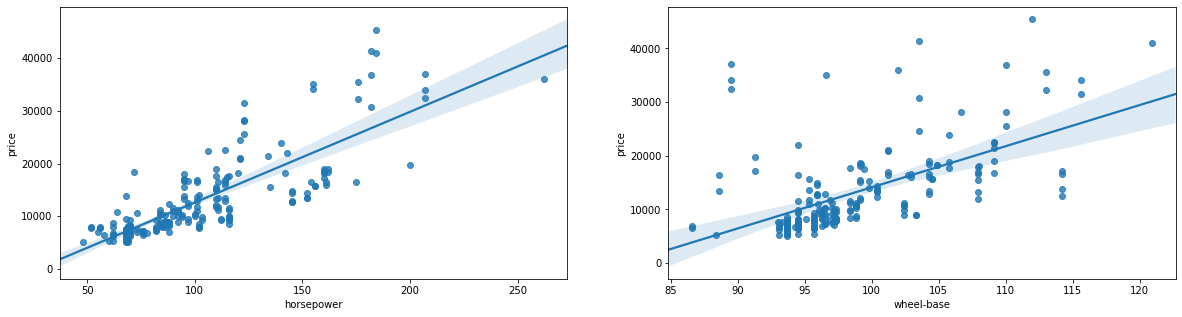

In [26]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sb.regplot(data=df,x='horsepower',y='price');
plt.subplot(1,2,2)
sb.regplot(data=df,x='wheel-base',y='price');

**there is linear relationship between price and some features maybe we can make a linear regression model for predicting price**

In [27]:
df['intercept']=1
mod1=sm.OLS(df['price'],df[['intercept','wheel-base','horsepower']])
results=mod1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     295.7
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           3.46e-60
Time:                        21:03:57   Log-Likelihood:                -1950.8
No. Observations:                 201   AIC:                             3908.
Df Residuals:                     198   BIC:                             3918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.455e+04   4722.125     -9.434      0.000   -5.39e+04   -3.52e+04
wheel-base   431.5936     50.216      8.595      0.000     332.567     530.621
horsepower   146.1928      8.153     17.932      0.000     130.116     162.270
==============================================================================
Omnibus:                       36.672   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.319
Skew:                           0.903   Prob(JB):                     8.86e-16
Kurtosis:                       5.240   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From p-value we can tell that those features are statistically significance**

In [28]:
mod2=sm.OLS(df['price'],df[['intercept','horsepower','curb-weight']])
results2=mod2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     331.5
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           6.33e-64
Time:                        21:03:57   Log-Likelihood:                -1942.1
No. Observations:                 201   AIC:                             3890.
Df Residuals:                     198   BIC:                             3900.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -1.632e+04   1424.070    -11.458      0.000   -1.91e+04   -1.35e+04
horsepower     88.5840     11.112      7.972      0.000      66.671     110.497
curb-weight     7.9687      0.803      9.928      0.000       6.386       9.552
==============================================================================
Omnibus:                       35.333   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.082
Skew:                           0.839   Prob(JB):                     2.23e-16
Kurtosis:                       5.406   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='conclusion'></a>
## Conclusion
**We tried the first model using the wheel-base and horsepower and R-squared was 0.749 and the second model using horsepower and curb-weight we found the R-squared=0.770 which is more stable**